***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [5]:
dados = pd.read_csv("dados.csv")

### Visualize o conteúdo do DataFrame

In [6]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [7]:
sm = 788
intervalo = [dados['Renda'].min(), 2*sm, 5*sm, 15*sm, 25*sm, dados['Renda'].max()]
intervalo

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [8]:
labels = ['E', 'D', 'C', 'B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [9]:
frequencia_absoluta = pd.value_counts(
    pd.cut(
        x=dados['Renda'],
        bins=intervalo,
        labels=labels,
        include_lowest=True)
)
frequencia_absoluta

Renda
E    49755
D    18602
C     7241
B      822
A      420
Name: count, dtype: int64

### 4º Construir a coluna de percentuais

In [10]:
frequencia_relativa = pd.value_counts(
    pd.cut(
        x=dados['Renda'],
        bins=intervalo,
        labels=labels,
        include_lowest=True),
    normalize=True
)
frequencia_relativa

Renda
E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: proportion, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [11]:
distribuicao_frequencia = pd.DataFrame({'Frequencia Absoluta': frequencia_absoluta,
                   'Frequencia Relativa': frequencia_relativa})
distribuicao_frequencia.sort_index(ascending=False, inplace=True)
distribuicao_frequencia

,Frequencia Absoluta,Frequencia Relativa
Renda,,
A,420,0.005466
B,822,0.010698
C,7241,0.094235
D,18602,0.242087
E,49755,0.647514


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: xlabel='Renda'>

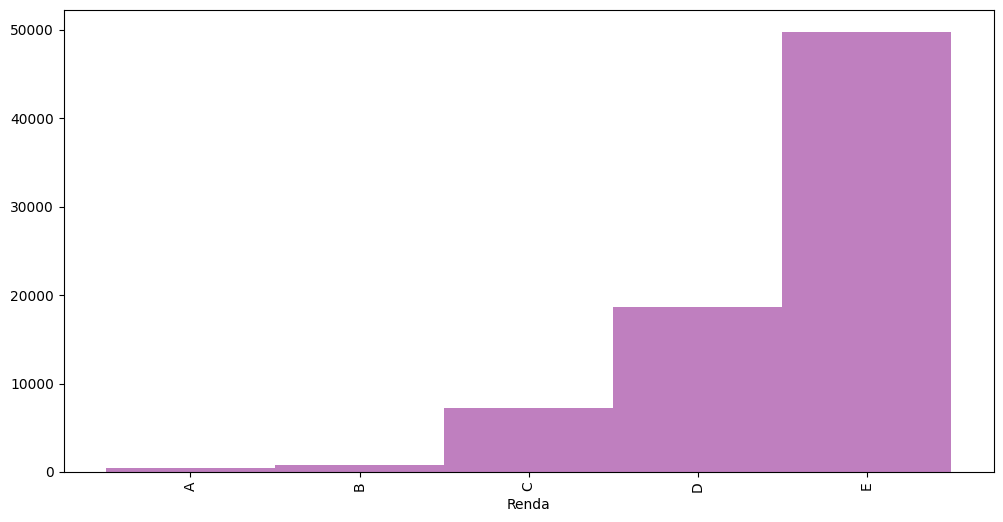

In [12]:
distribuicao_frequencia['Frequencia Absoluta'].plot.bar(width=1.0, color='purple', alpha=0.5, figsize=(12, 6))

> ### Conclusões
A frequência dos dados para as categorias A e B são extremamente baixas comparadas as demais categorias.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

/tmp/ipykernel_6129/236461848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Idade)


'\nComentários sobre o histograma para a variável quantitativa Idade \n-> Possui assimetria a direita\n-> Moda < Mediana < Média\n'

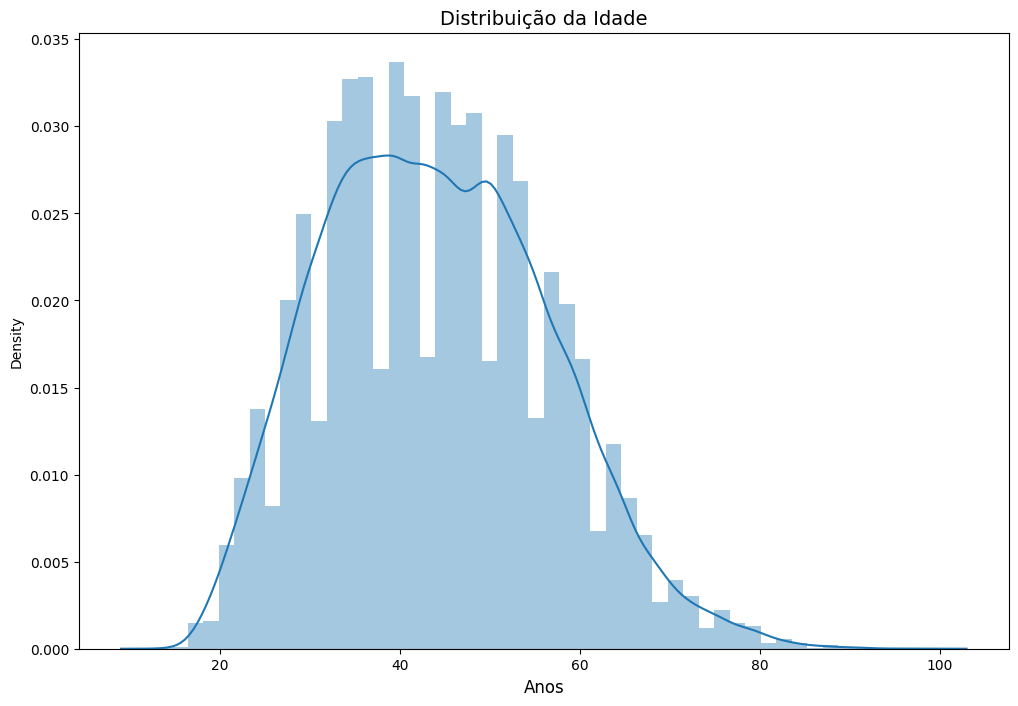

In [85]:
ax = sns.distplot(dados.Idade)
ax.figure.set_size_inches(12, 8)
ax.set_title("Distribuição da Idade", fontsize=14)
ax.set_xlabel("Anos", fontsize=12)
ax

"""
Comentários sobre o histograma para a variável quantitativa Idade 
-> Possui assimetria a direita
-> Moda < Mediana < Média
"""

/tmp/ipykernel_6129/1361480762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query("Renda < 10000").Renda)


'\nComentários sobre o histograma para a variável quantitativa Renda \n-> Possui assimetria a direita\n-> Moda < Mediana < Média\n\nA coluna Frequência Relativa na tabela distribuicao_frequencia mostra que mais de\n80% dos dados correspondem as categorias D e E. O que significa que a maior parte\ndas pessoas da nossa amostra possuem renda inferior a 5 salários mínimos, enquanto\numa pequena parcela possui salários acima deste valor. São os indivíduos das outras\ncategorias, principalmente B e A, que "puxam" a distribuição a direita em direção\nao crescimento da Renda.\n'

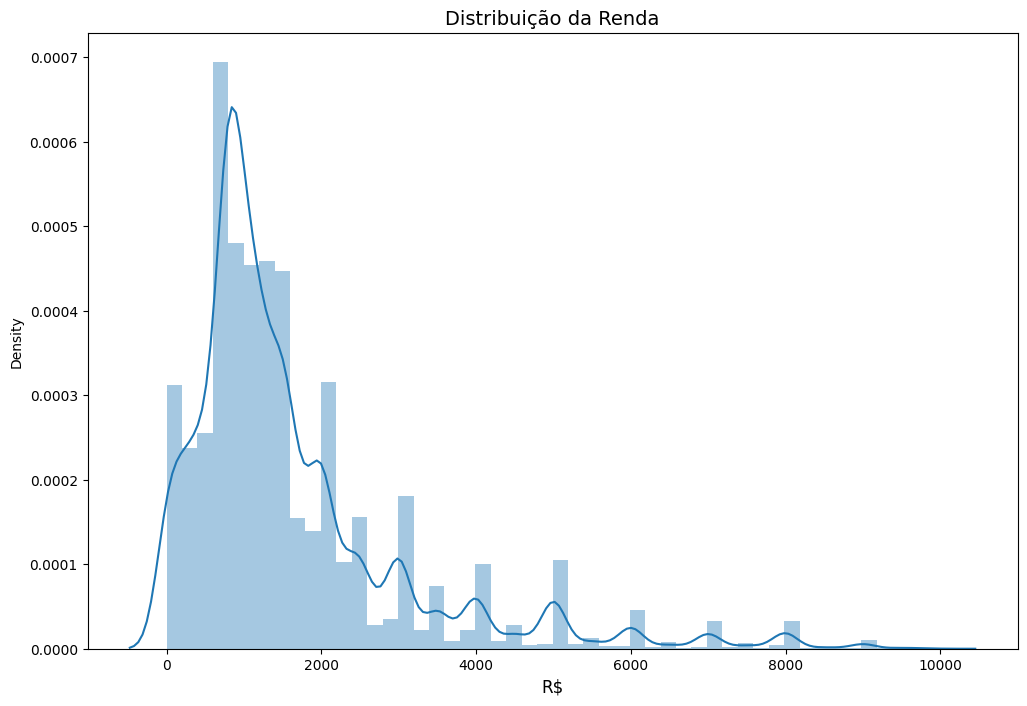

In [14]:
ax = sns.distplot(dados.query("Renda < 10000").Renda)
ax.figure.set_size_inches(12, 8)
ax.set_title("Distribuição da Renda", fontsize=14)
ax.set_xlabel("R$", fontsize=12)
ax

"""
Comentários sobre o histograma para a variável quantitativa Renda 
-> Possui assimetria a direita
-> Moda < Mediana < Média

A coluna Frequência Relativa na tabela distribuicao_frequencia mostra que mais de
80% dos dados correspondem as categorias D e E. O que significa que a maior parte
das pessoas da nossa amostra possuem renda inferior a 5 salários mínimos, enquanto
uma pequena parcela possui salários acima deste valor. São os indivíduos das outras
categorias, principalmente B e A, que "puxam" a distribuição a direita em direção
ao crescimento da Renda.
"""

/tmp/ipykernel_6129/375933257.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


'\nComentários sobre o histograma para a variável quantitativa Renda \n-> É sométrico\n-> Moda = Mediana = Média\n'

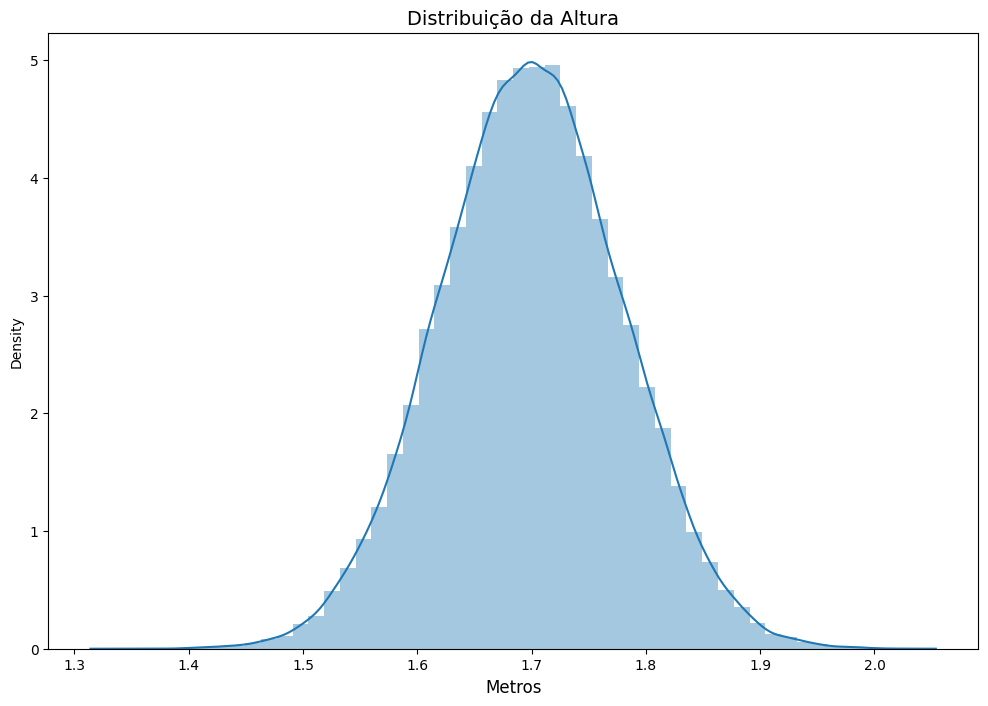

In [15]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12, 8)
ax.set_title("Distribuição da Altura", fontsize=14)
ax.set_xlabel("Metros", fontsize=12)
ax

"""
Comentários sobre o histograma para a variável quantitativa Renda 
-> É sométrico
-> Moda = Mediana = Média
"""

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/tmp/ipykernel_6129/626967102.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query("Renda < 20000").Renda)


<Axes: title={'center': 'Distribuição da Renda'}, xlabel='R$', ylabel='Density'>

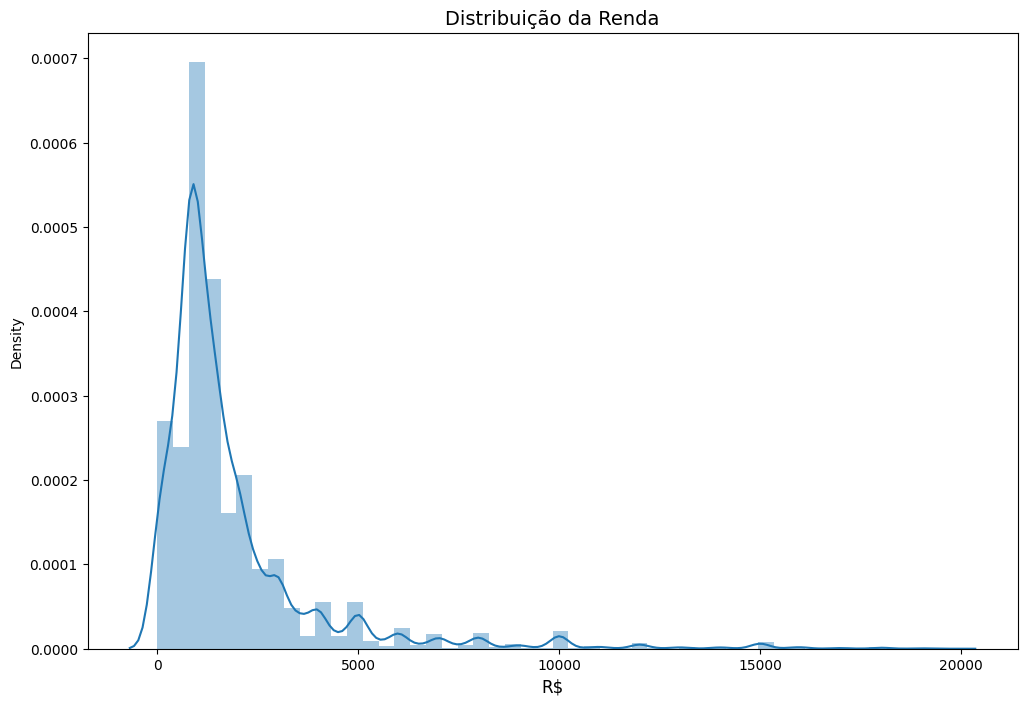

In [16]:
ax = sns.distplot(dados.query("Renda < 20000").Renda)
ax.figure.set_size_inches(12, 8)
ax.set_title("Distribuição da Renda", fontsize=14)
ax.set_xlabel("R$", fontsize=12)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [24]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [30]:
tabela_sexo_cor = pd.crosstab(index=dados['Sexo'], columns=dados['Cor'])
tabela_sexo_cor.rename(sexo, axis=0, inplace=True)
tabela_sexo_cor.rename(cor, axis=1, inplace=True)
tabela_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [31]:
tabela_sexo_cor = pd.crosstab(index=dados['Sexo'], columns=dados['Cor'], normalize=True)
tabela_sexo_cor.rename(sexo, axis=0, inplace=True)
tabela_sexo_cor.rename(cor, axis=1, inplace=True)
tabela_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.003332,0.288834,0.071603,0.003058,0.326171
Feminino,0.001314,0.125208,0.037598,0.001523,0.141359


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [32]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [33]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [34]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [45]:
(dados.Renda - dados.Renda.mean()).abs().sum() / len(dados)

1526.4951371638058

### Obtenha a variância

In [48]:
(dados.Renda - dados.Renda.mean()).pow(2).sum() / (len(dados) - 1)

11044906.006217021

In [47]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [49]:
np.sqrt((dados.Renda - dados.Renda.mean()).pow(2).sum() / (len(dados) - 1))

3323.3877303464037

In [50]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [130]:
tabela_sexo_cor_renda = pd.crosstab(index=dados['Cor'], columns=dados['Sexo'], aggfunc={'mean', 'median', 'max'}, values=dados['Renda'])
tabela_sexo_cor_renda.rename(cor, axis=0, inplace=True)
tabela_sexo_cor_renda.rename(sexo, axis=1, inplace=True)
tabela_sexo_cor_renda

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

A renda para o sexo femino costuma ser inferior a apresenta por homens para todas as cores e raças. 
Mulheres negras possuem renda média aproximadamente 2x menor que mulheres brancas.
Fato curioso: Mulher indígena com renda 120k (Único caso em que a renda feminina é maior que a masculina)

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [129]:
tabela_sexo_cor_renda = pd.crosstab(index=dados['Cor'], columns=dados['Sexo'], aggfunc={'var', 'std'}, values=dados['Renda'])
tabela_sexo_cor_renda.rename(cor, axis=0, inplace=True)
tabela_sexo_cor_renda.rename(sexo, axis=1, inplace=True)
tabela_sexo_cor_renda

std                         var              
Sexo        Masculino      Feminino     Masculino      Feminino
Cor                                                            
Indígena  1204.093490  11957.498292  1.449841e+06  1.429818e+08
Branca    4750.791872   3251.013154  2.257002e+07  1.056909e+07
Preta     1936.309271   1349.799809  3.749294e+06  1.821960e+06
Amarela   5740.824820   3731.173660  3.295707e+07  1.392166e+07
Parda     2312.087184   1596.233048  5.345747e+06  2.547960e+06

> ### Conclusões

Os dados correspondentes ao sexo femino possuem menor dispersão comparado ao masculino.
No caso de mulheres negras, temos o desvio padrão de 1349, sendo um dos menores desvios
na nossa tabela cruzada sexo e cor em relação a renda. O que indica que os dados para 
essas categorias estão próximos, não havendo tantos casos destoantes.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Cor'>

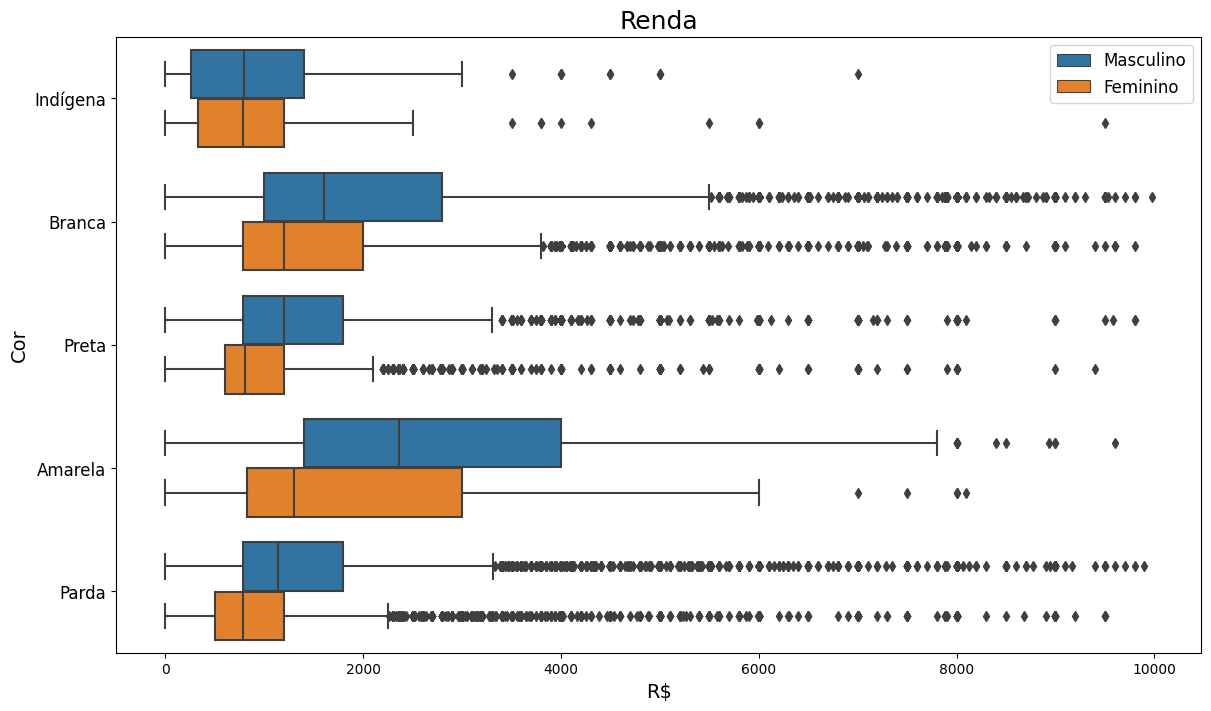

In [123]:
ax = sns.boxplot(x='Renda', y='Cor', hue='Sexo', data=dados.query("Renda < 10000 "), orient='h')
ax.figure.set_size_inches(14, 8)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax.set_ylabel("Cor", fontsize=14)
ax.set_yticklabels(list(cor.values())[0:-1], fontsize=12)

lg, _ = ax.get_legend_handles_labels()
ax.legend(lg, list(sexo.values()), fontsize=12)
ax

> ### Conclusões

Todos são assimétricos a direita
A mediana dos homens amarelos é a maior
25% dos homens amarelos possuem renda acima de R$ 4000,00
75% das mulheres negras possuem renda inferior a R$ 2000,00


# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [124]:
from scipy import stats

print('O percentual de pessoas que ganham um salário mínimo ou menos é de %.2f%%' % stats.percentileofscore(dados['Renda'], sm, kind='weak'))


O percentual de pessoas que ganham um salário mínimo ou menos é de 28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [126]:
dados['Renda'].quantile(0.99)

15000.0

In [76]:
dados.Renda.quantile([i / 100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [128]:
tabela_sexo_estudos_renda = pd.crosstab(index=dados['Anos de Estudo'], columns=dados['Sexo'], aggfunc={'mean', 'median', 'max', 'std'}, values=dados['Renda'])
tabela_sexo_estudos_renda.rename(anos_de_estudo, axis=0, inplace=True)
tabela_sexo_estudos_renda.rename(sexo, axis=1, inplace=True)
tabela_sexo_estudos_renda

max                  mean               \
Sexo                           Masculino Feminino    Masculino     Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano     30000    10000   799.494638   516.201748   
1 ano                              30000     2000   895.629047   492.771987   
2 anos                             40000     4000   931.178986   529.911638   
3 anos                             80000     3500  1109.203862   546.853916   
4 anos                             50000    10000  1302.329283   704.279111   
5 anos                             35000     8000  1338.653218   781.389776   
6 anos                             25000     6000  1448.875419   833.732824   
7 anos                             40000     9000  1465.497940   830.751004   
8 anos                             30000    18000  1639.396667   933.615351   
9 anos                             60000    20000  1508.038850   868.021700   
10 anos                            45000     6000  1731.270847   925.919225   
11 anos                           200000   100000  2117.060504  1286.790889   
12 anos                            30000   120000  2470.330776  1682.313725   
13 anos                            25000    20000  3195.099154  1911.730047   
14 anos                            50000    20000  3706.620269  2226.460457   
15 anos ou mais                   200000   100000  6134.279790  3899.513231   
Não determinados                    7000     3000  1295.761905   798.174419   

                                  median                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     700.0    390.0  1023.904884   639.311534  
1 ano                              788.0    400.0  1331.950552   425.291842  
2 anos                             788.0    450.0  1435.173827   498.234168  
3 anos                             800.0    500.0  2143.800133   424.124446  
4 anos                            1000.0    788.0  1419.821787   629.553397  
5 anos                            1045.0    788.0  1484.650587   635.782641  
6 anos                            1200.0    788.0  1476.628602   574.547028  
7 anos                            1200.0    788.0  1419.708673   602.038029  
8 anos                            1300.0    800.0  1515.583715   896.781213  
9 anos                            1200.0    788.0  2137.664774   973.221652  
10 anos                           1218.0    800.0  2078.609734   620.611907  
11 anos                           1500.0   1000.0  2676.538942  1819.040417  
12 anos                           1800.0   1200.0  2268.081538  4851.833513  
13 anos                           2400.0   1300.0  2797.116800  2053.789771  
14 anos                           2500.0   1600.0  3987.214974  2064.083336  
15 anos ou mais                   4000.0   2800.0  7447.613594  4212.770709  
Não determinados                  1200.0    788.0   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Anos de Estudo'>

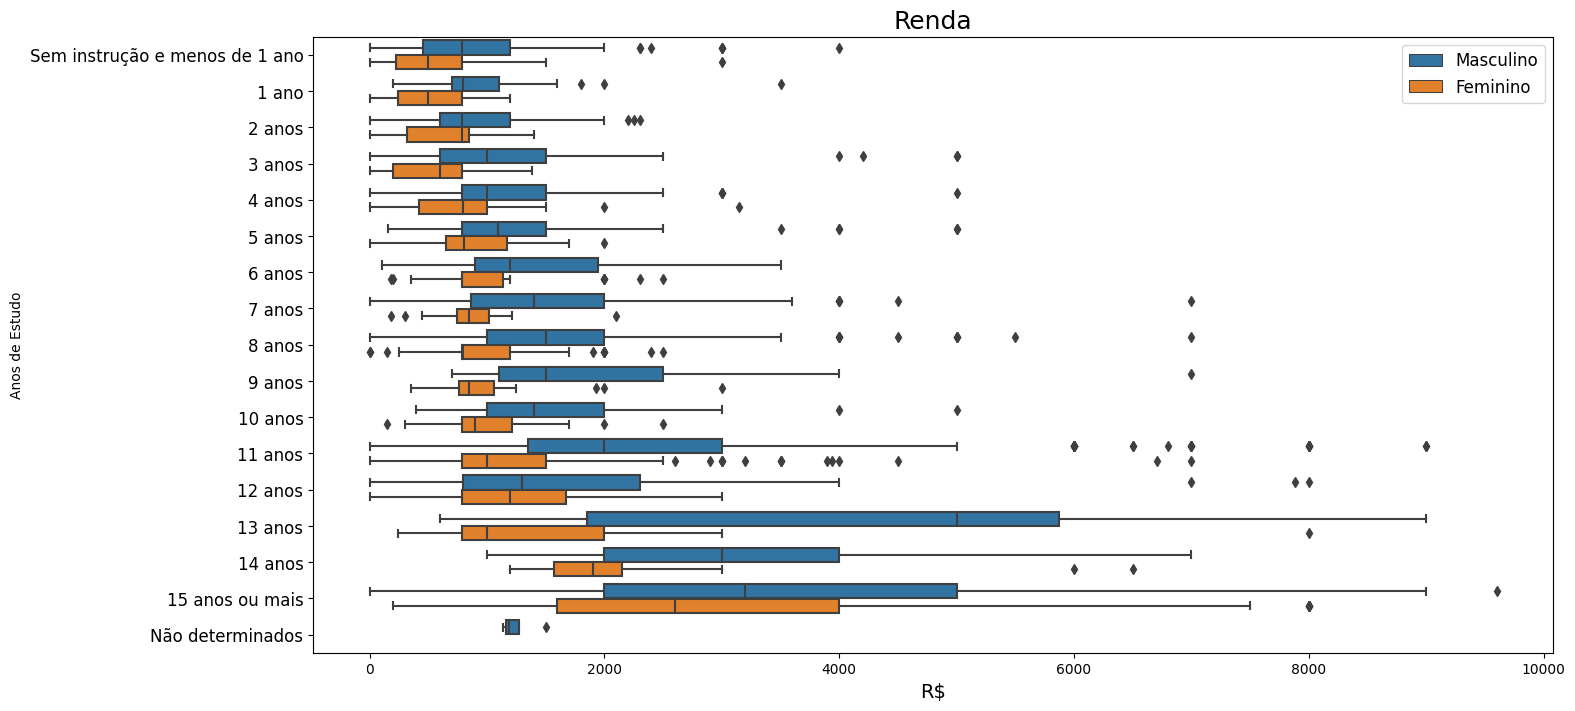

In [133]:
ax = sns.boxplot(x='Renda', y='Anos de Estudo', hue='Sexo', data=dados.query("Renda < 10000 and Idade==50"), orient='h')
ax.figure.set_size_inches(16, 8)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax.set_yticklabels(list(anos_de_estudo.values()), fontsize=12)

lg, _ = ax.get_legend_handles_labels()
ax.legend(lg, list(sexo.values()), fontsize=12)
ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [135]:
renda_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_uf.rename(index=uf)

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='UF'>

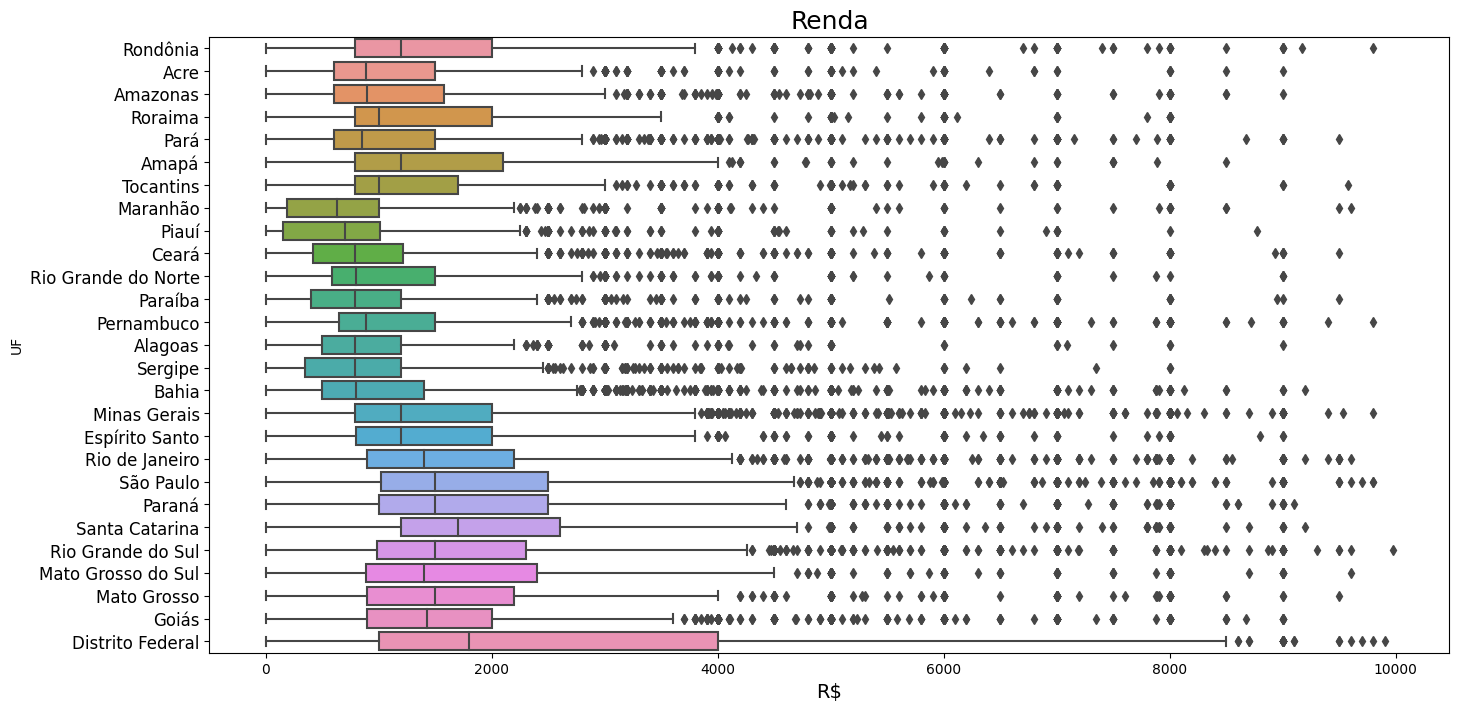

In [136]:
ax = sns.boxplot(x='Renda', y='UF', data=dados.query("Renda < 10000"), orient='h')
ax.figure.set_size_inches(16, 8)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax.set_yticklabels([x for x in uf.values()], fontsize=12)
ax

> ### Conclusões

Escreva suas conclusões aqui...